<h1 style="color:green"> Face Mask Detection Using Transfare Learning _________________ (Project 5) </h1>


<h2 style="color:purple"> Workflow Steps</h2>
<h3 style="color:orange">
    
1. Problem Definition
2. Import Libraries and Dependencies
3. Data Collection
4. Data Preparation
5. Data Visualization 
6. ML & DL Modeling
7. Evaluate & Test Model
8. Predict New Test Data
</h3>


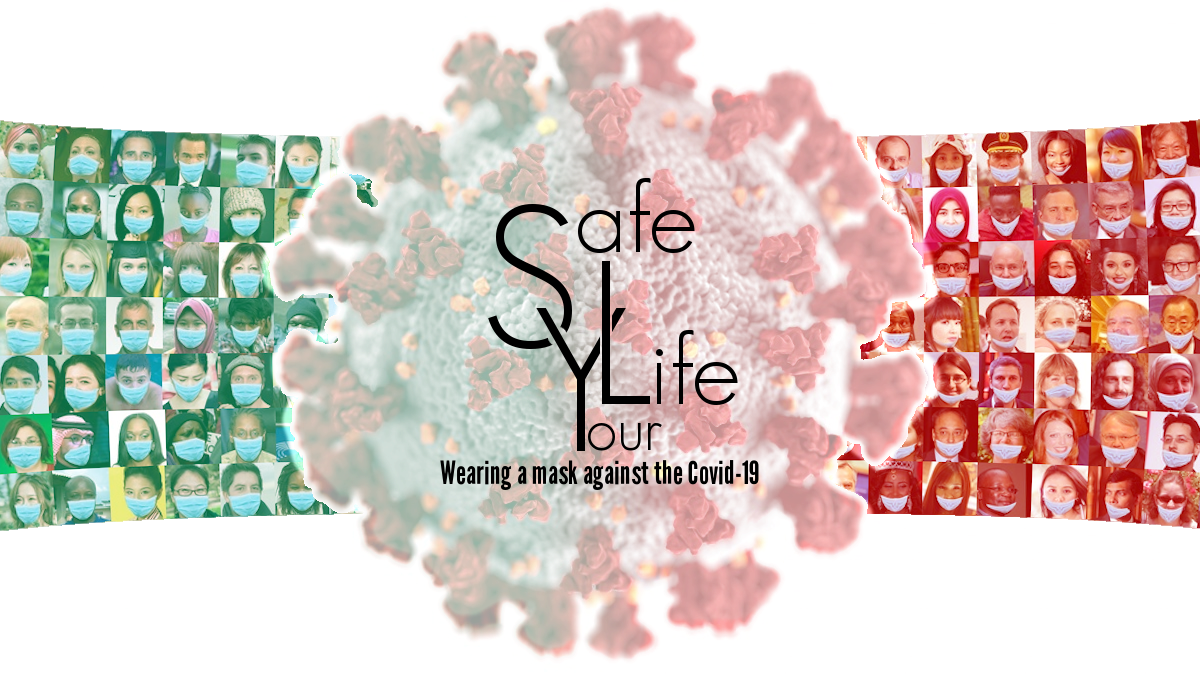

<h2 style="color:blue">1. Problem Definition</h2>

### Covid-19 Face Mask Detection- CNN & Open CV


Face mask detection system using optimistic convolutional neural network face mask detection code in python Tensorflow OpenCV Object detection using deep learning

<h2 style="color:blue">2. Import Libraries and Dependencies</h2>

In [3]:
import os                                                  # use for read or write a file 
import cv2                                                 # use for Read Images
import numpy as np                                         # use for store data as numpy Array
import matplotlib.pyplot as plt                            # use for Visualize Data
import pandas as pd                                        # 
import tensorflow as tf                                    # use for Build Model
from tensorflow import keras                               # use for Build Model
from sklearn.model_selection import train_test_split       # use for Split Data into (x_train,y_train),(x_test, y_test)

<h2 style="color:blue">3. Data Collection</h2>

In [ ]:
DATADIR = "Dataset"                                                                  # Define Dataset folder Path.

CATEGORIES = ['Face_Mask','No_Mask']                                                 # Category list Initialization.                                                                       # Defince Image Size =32*32 (h*w).
IMG_SIZE=224
def create_training_data():
    training_data = []                                                               # Train_Data list Initialization.
    for category in CATEGORIES:                                                      # do category [0,1,2,.....,43]. 
        path = os.path.join(DATADIR,category)                                        # create path to category Dataset\[0-43]
        class_num = CATEGORIES.index(category)                                       # get the classification  (0-43). 

        for img in os.listdir(path):                                                 # iterate over each image category[0-43].
            try:
                img_array = cv2.imread(os.path.join(path,img)) # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])              # add this to our training_data
                
            except Exception as e:                                        # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return training_data

In [ ]:
data=create_training_data()
print(len(data))


<h2 style="color:blue">4. Data Preparation</h2>

In [ ]:
import random
random.shuffle(data)

x=[]
y=[]

for img ,label in data:
    x.append(img)
    y.append(int(label))

x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y=np.array(y)

In [ ]:
# normalize data
x=x/255

In [ ]:
# store data after Clean it

import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
import pickle
# load Data from Pcikel file

pickle_in=open("X.pickle","rb")
x=pickle.load(pickle_in)

pickle_in=open("Y.pickle","rb")
y=pickle.load(pickle_in)

<h2 style="color:blue">5. Data Visualization </h2>

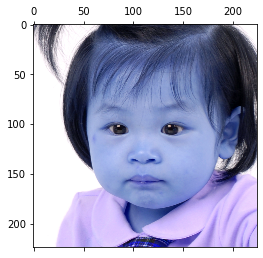

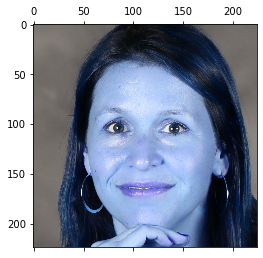

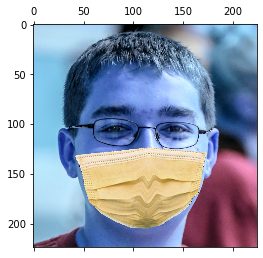

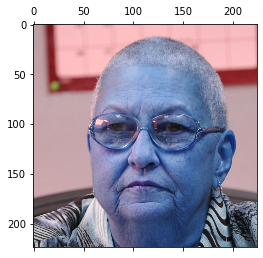

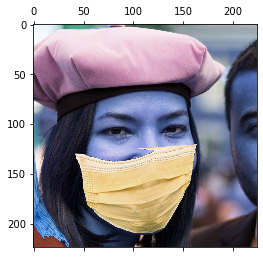

In [8]:
for i in range(5):
    plt.matshow(x[i])

In [9]:
y[:5]

array([1, 1, 0, 1, 0])

<h2 style="color:blue">6. ML & DL Modeling</h2>

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model =tf.keras.applications.mobilenet.MobileNet()

In [12]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [13]:
input_img=model.layers[0].input
output_img=model.layers[-4].output

In [14]:
Flat_layer=layers.Flatten()(output_img)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [15]:
new_model=keras.Model(input_img,final_output)

In [16]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [17]:
new_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [18]:
new_model.fit(x,y,epochs=1 ,validation_split=0.1)

55/55 [==============================] - 30s 294ms/step - loss: 0.0144 - accuracy: 0.9926 - val_loss: 2.5452e-04 - val_accuracy: 1.0000


<h2 style="color:blue">7. Evaluate & Test Model</h2>

In [19]:
new_model.evaluate(x,y)

61/61 [==============================] - 4s 63ms/step - loss: 0.0080 - accuracy: 0.9990


[0.007960693910717964, 0.9989743828773499]

In [87]:
with tf.device('/CPU:0'):
    result=new_model.predict(x)

In [96]:
result=result.reshape(-1,)
result=np.array([round(i) for i in result])
result[:20]

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [97]:
y[:20]

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [98]:
from sklearn.metrics import confusion_matrix , classification_report

In [99]:
cm=confusion_matrix(y,result)
cm

array([[ 948,    2],
       [   0, 1000]], dtype=int64)

<AxesSubplot:>

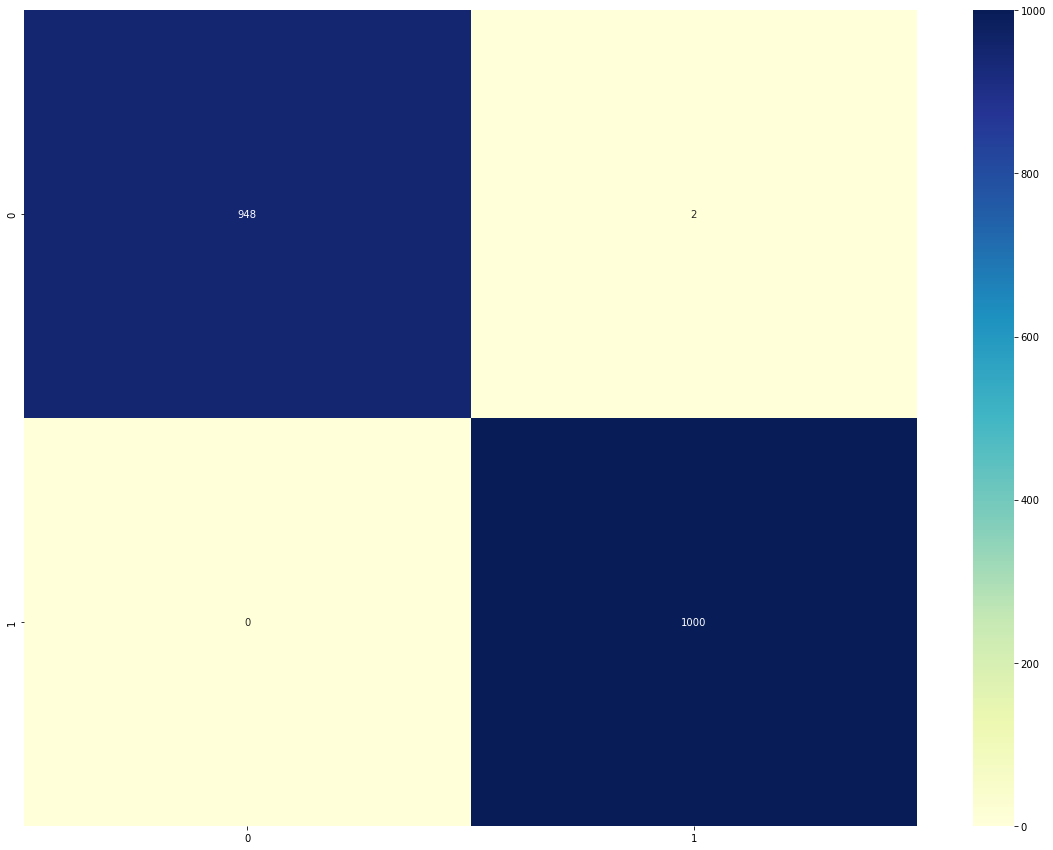

In [100]:
import seaborn as sn

plt.figure(figsize=(20,15))
sn.heatmap(cm,annot=True ,fmt='d',cmap="YlGnBu")

In [ ]:
new_model.save('Nasser_faceMask.h5')

In [101]:
import tensorflow as tf
face_model=tf.keras.models.load_model('Nasser_faceMask.h5')

<h2 style="color:blue">8. Predict New Test Data</h2>

In [102]:
Face_imag=cv2.imread('Dataset/Face_Mask/00012_Mask.jpg')

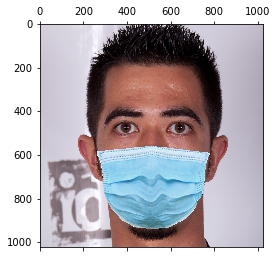

In [103]:
plt.matshow(cv2.cvtColor(Face_imag,cv2.COLOR_BGR2RGB))

In [104]:
Face_imag=cv2.resize(Face_imag,(224,224))
Face_imag=np.expand_dims(Face_imag,axis=0)


In [105]:
Face_imag=Face_imag/255

In [106]:
y_perdict=face_model.predict(Face_imag)

In [107]:
round(y_perdict[0][0])

0

In [108]:
facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

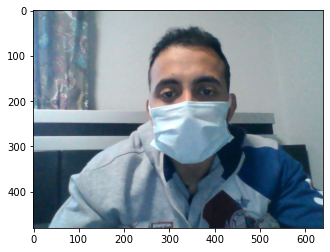

In [109]:
#frame=cv2.imread('test_img.jpg')                                      # no Face Mask
#frame=cv2.imread('test_img2.jpg')                                    # with Face Mask
#frame=cv2.imread('c1.png')                                            # no Face Mask
frame=cv2.imread('c2.png')                                            # with Face Mask
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [110]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [111]:
gray.shape

(480, 640)

In [112]:
face=facecascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in face:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces=facecascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not Detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey: ey+eh, ex:ex +ew]
    

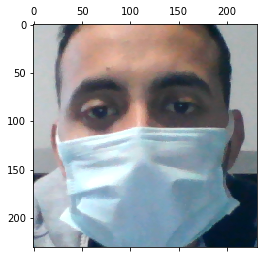

In [113]:
plt.matshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [114]:
face_roi.shape

(231, 231, 3)

In [115]:
Face_imag=cv2.resize(face_roi,(224,224))
Face_imag=np.expand_dims(Face_imag,axis=0)
Face_imag=Face_imag/255

In [116]:
y_perdict=face_model.predict(Face_imag)
classes = ['Face_Mask','No_Mask'] 

In [117]:
classes[round(y_perdict[0][0])]

'Face_Mask'

# Reail Time Face Detection

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
regtangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="face mask Detection"

(text_w,text_h)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_strat_x=10
text_start_y=img.shape[0]-25

box_coords=((text_strat_x,text_start_y),(text_strat_x+text_w+2,text_start_y-text_h-2))
cv2.rectangle(img,box_coords[0],box_coords[1],regtangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_strat_x,text_start_y),font,fontScale=font_scale, color=(0,0,0),thickness=1)


cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open WebCam")
    
while True:
    ret,frame=cap.read()
    facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    face=facecascade.detectMultiScale(gray,1.1,7)

    for x,y,w,h in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        faces=facecascade.detectMultiScale(roi_gray)
        if len(faces)==0:
            print("")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi=roi_color[ey: ey+eh, ex:ex +ew]
                
    Face_imag=cv2.resize(face_roi,(224,224))
    Face_imag=np.expand_dims(Face_imag,axis=0)
    Face_imag=Face_imag/255
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictrion=face_model.predict(Face_imag)
    #print(Predictrion[0][0])
    
    
    if not (round(Predictrion[0][0])<=0):
        status="NO Face Mask"
        x1,y1,w1,h1=0,0,225,100
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(255,255,255),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
       # cv2.putText(frame,status,(100,150),font,1,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        print("No Face Mask -----------")
    else:
        status="Face Mask"
        x1,y1,w1,h1=0,0,225,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(255,255,255),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        #cv2.putText(frame,status,(100,150),font,1,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0))
        
        print("There is Face Mask ++++++++++++++++++++++++++++++++++")
                
    cv2.imshow("Face Mask Detector",frame)
    
    if cv2.waitKey(2)&0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------

No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------

No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask -----------
No Face Mask ----------